In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../datasets/primary_dataset.csv')
df_shopping_place = pd.read_csv('../datasets/jumlah_mart_bandung.csv')

df_shopping_place_count = df_shopping_place['jumlah']

# Clean and standardize kecamatan names in both dataframes
df['kecamatan'] = df['kecamatan'].str.lower().str.strip()
df_shopping_place['kecamatan'] = df_shopping_place['kecamatan'].str.lower().str.strip()

# Fix specific mismatches
df.loc[df['kecamatan'] == 'ujungberung', 'kecamatan'] = 'ujung berung'
df_shopping_place.loc[df_shopping_place['kecamatan'] == 'ujungberung'] = 'ujung berung'

# Create mapping from df_shopping_place
shopping_mapping = df_shopping_place.groupby('kecamatan')['jumlah'].sum().to_dict()

# Map the shopping place counts to df
df['jumlah_shopping_place'] = df['kecamatan'].map(shopping_mapping)

# Check for any unmapped values
unmapped = df[df['jumlah_shopping_place'].isna()]['kecamatan'].unique()

# Create fnb_count by counting restaurants per kecamatan
fnb_count = df[df['type'] == 'restaurant'].groupby('kecamatan').size().reset_index(name='jumlah_restaurant')

# Create mapping from fnb_count and map to df
fnb_mapping = fnb_count.set_index('kecamatan')['jumlah_restaurant'].to_dict()
df['fnb_count'] = df['kecamatan'].map(fnb_mapping)
# Display the fnb_count

# Fill missing demographic data for rows with same kecamatan
kecamatan_demo_mapping = df.groupby('kecamatan').agg({
    'Jumlah Penduduk': 'first',
    'Luas Wilayah (km²)': 'first', 
    'Kepadatan (jiwa/km²)': 'first'
}).to_dict('index')

# Track which kecamatan couldn't be filled
failed_kecamatan = set()

for idx, row in df.iterrows():
    kecamatan = row['kecamatan']
    
    # Check if any demographic data is missing
    if pd.isna(row['Jumlah Penduduk']) or pd.isna(row['Luas Wilayah (km²)']) or pd.isna(row['Kepadatan (jiwa/km²)']):
        if kecamatan in kecamatan_demo_mapping:
            # Fill missing values from mapping
            if pd.isna(row['Jumlah Penduduk']):
                df.at[idx, 'Jumlah Penduduk'] = kecamatan_demo_mapping[kecamatan]['Jumlah Penduduk']
            if pd.isna(row['Luas Wilayah (km²)']):
                df.at[idx, 'Luas Wilayah (km²)'] = kecamatan_demo_mapping[kecamatan]['Luas Wilayah (km²)']
            if pd.isna(row['Kepadatan (jiwa/km²)']):
                df.at[idx, 'Kepadatan (jiwa/km²)'] = kecamatan_demo_mapping[kecamatan]['Kepadatan (jiwa/km²)']
        else:
            failed_kecamatan.add(kecamatan)

# Print kecamatan that couldn't be filled
if failed_kecamatan:
    print("Kecamatan yang tidak ditemukan atau gagal diisi:")
    for kec in failed_kecamatan:
        print(f"- {kec}")
else:
    print("Semua data kecamatan berhasil diisi")

print(f"\nJumlah fnb_count: {fnb_count.shape[0]}")
print(fnb_count.head())


#Ensure theres no duplicates in the df
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)
df.isnull().sum()


# df_null.isna().sum()

# # Create heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.select_dtypes(include=np.number), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.tight_layout()
# plt.show()


KeyError: "Column(s) ['Kepadatan (jiwa/km²)', 'Luas Wilayah (km²)'] do not exist"

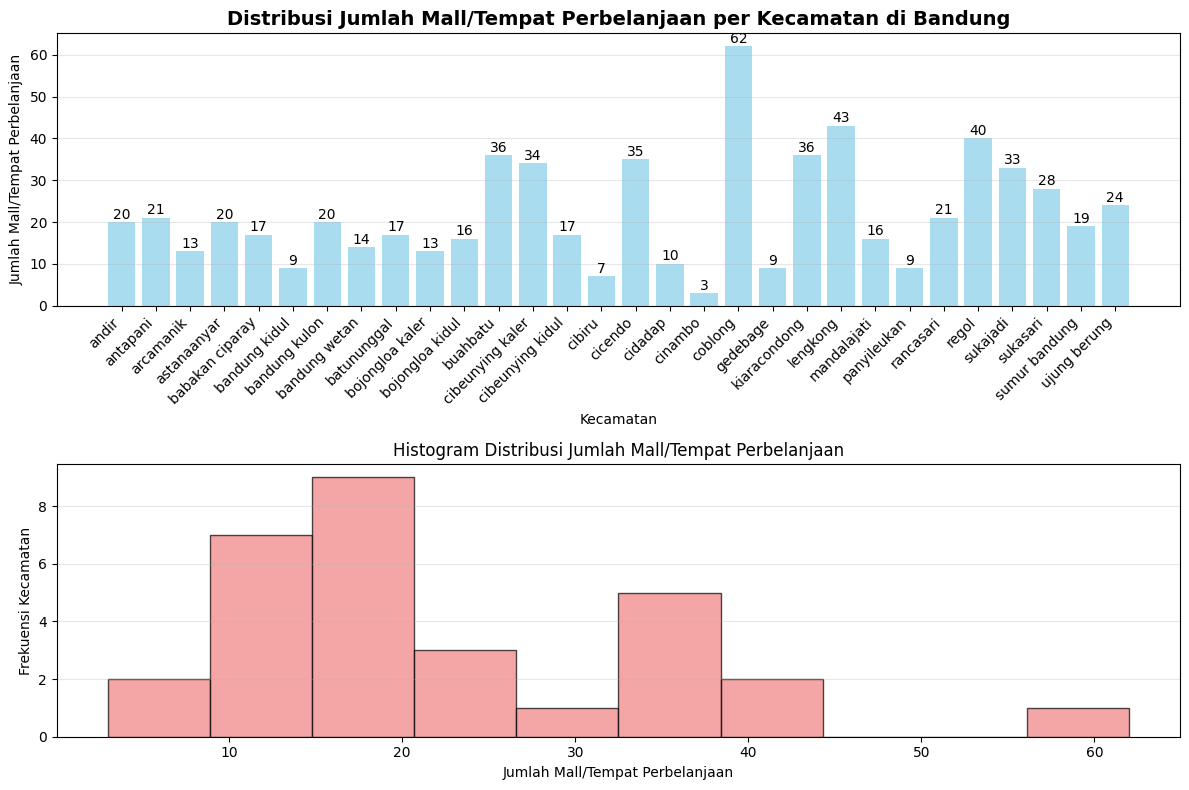

Statistik Distribusi Jumlah Mall/Tempat Perbelanjaan per Kecamatan:
Total kecamatan: 30
Rata-rata: 22.07
Median: 19.50
Minimum: 3
Maximum: 62
Standar deviasi: 12.95


In [3]:
# Create distribution plot for shopping places per kecamatan
plt.figure(figsize=(12, 8))

# Get shopping place counts per kecamatan
shopping_counts = df_shopping_place.groupby('kecamatan')['jumlah'].sum().reset_index()

# Create bar plot
plt.subplot(2, 1, 1)
bars = plt.bar(shopping_counts['kecamatan'], shopping_counts['jumlah'], color='skyblue', alpha=0.7)
plt.title('Distribusi Jumlah Mall/Tempat Perbelanjaan per Kecamatan di Bandung', fontsize=14, fontweight='bold')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Mall/Tempat Perbelanjaan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

# Create histogram
plt.subplot(2, 1, 2)
plt.hist(shopping_counts['jumlah'], bins=10, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Histogram Distribusi Jumlah Mall/Tempat Perbelanjaan', fontsize=12)
plt.xlabel('Jumlah Mall/Tempat Perbelanjaan')
plt.ylabel('Frekuensi Kecamatan')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Statistik Distribusi Jumlah Mall/Tempat Perbelanjaan per Kecamatan:")
print(f"Total kecamatan: {len(shopping_counts)}")
print(f"Rata-rata: {shopping_counts['jumlah'].mean():.2f}")
print(f"Median: {shopping_counts['jumlah'].median():.2f}")
print(f"Minimum: {shopping_counts['jumlah'].min()}")
print(f"Maximum: {shopping_counts['jumlah'].max()}")
print(f"Standar deviasi: {shopping_counts['jumlah'].std():.2f}")

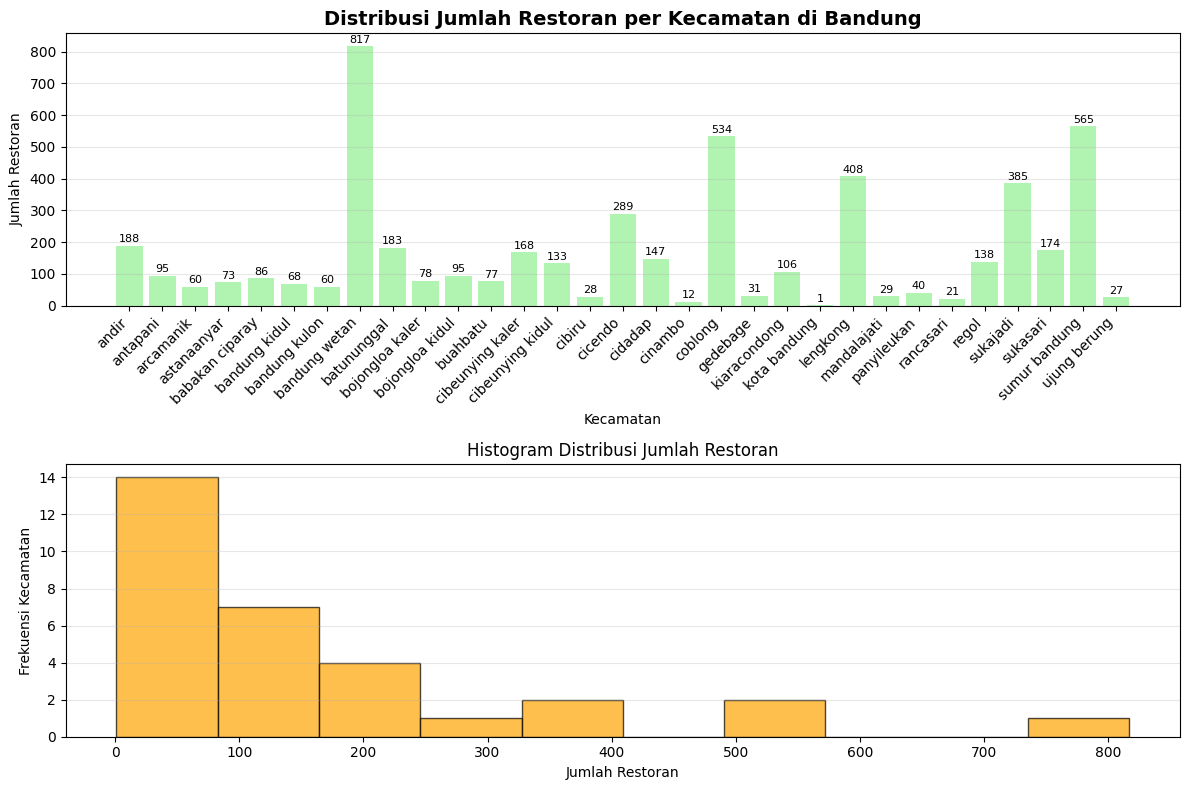

Statistik Distribusi Jumlah Restoran per Kecamatan:
Total kecamatan: 31
Rata-rata: 165.03
Median: 95.00
Minimum: 1
Maximum: 817
Standar deviasi: 189.98


In [4]:
# Create distribution plot for restaurants per kecamatan
plt.figure(figsize=(12, 8))

# Create bar plot
plt.subplot(2, 1, 1)
bars = plt.bar(fnb_count['kecamatan'], fnb_count['jumlah_restaurant'], color='lightgreen', alpha=0.7)
plt.title('Distribusi Jumlah Restoran per Kecamatan di Bandung', fontsize=14, fontweight='bold')
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Restoran')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Create histogram
plt.subplot(2, 1, 2)
plt.hist(fnb_count['jumlah_restaurant'], bins=10, color='orange', alpha=0.7, edgecolor='black')
plt.title('Histogram Distribusi Jumlah Restoran', fontsize=12)
plt.xlabel('Jumlah Restoran')
plt.ylabel('Frekuensi Kecamatan')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Statistik Distribusi Jumlah Restoran per Kecamatan:")
print(f"Total kecamatan: {len(fnb_count)}")
print(f"Rata-rata: {fnb_count['jumlah_restaurant'].mean():.2f}")
print(f"Median: {fnb_count['jumlah_restaurant'].median():.2f}")
print(f"Minimum: {fnb_count['jumlah_restaurant'].min()}")
print(f"Maximum: {fnb_count['jumlah_restaurant'].max()}")
print(f"Standar deviasi: {fnb_count['jumlah_restaurant'].std():.2f}")

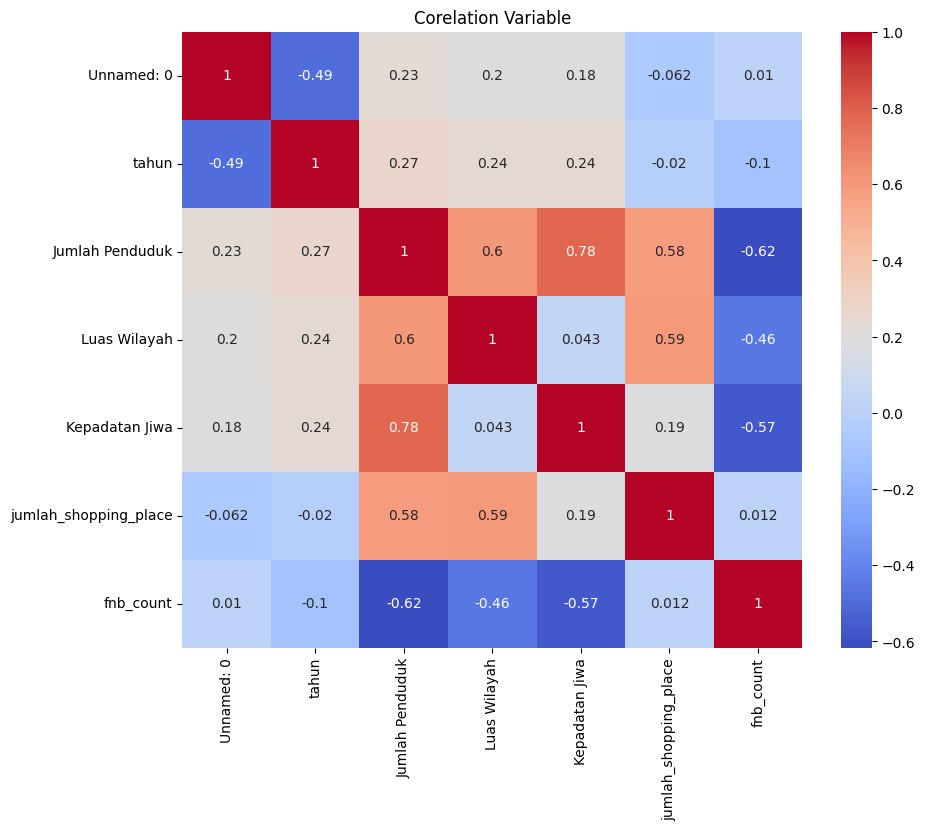

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True, cmap='coolwarm')
plt.title('Corelation Variable')
plt.savefig('../results/Correlation_Variable.png')

In [13]:
# TODO : Ubah ke rating untuk mengetahui tingkat distribusi rating restoran

# plt.figure(figsize=(20,10))
# sns.countplot(x="Luas Wilayah", data=df) 
# plt.title('Distribusi Luas Wilayah')
# plt.savefig('../results/Distribusi Luas Wilayah.png')

In [15]:
missing_val = df.isnull().sum()
percentage_missing = (missing_val / len(df)) * 100
missing_data_info = pd.DataFrame({'Missing Value': missing_val, 'Percentage': percentage_missing})
missing_data_info

,Missing Value,Percentage
Unnamed: 0,0,0.000000
nama,0,0.000000
alamat,0,0.000000
kecamatan,0,0.000000
type,0,0.000000
tahun,0,0.000000
source_file,0,0.000000
Jumlah Penduduk,4907,90.218790
Luas Wilayah,4907,90.218790
Kepadatan Jiwa,4907,90.218790


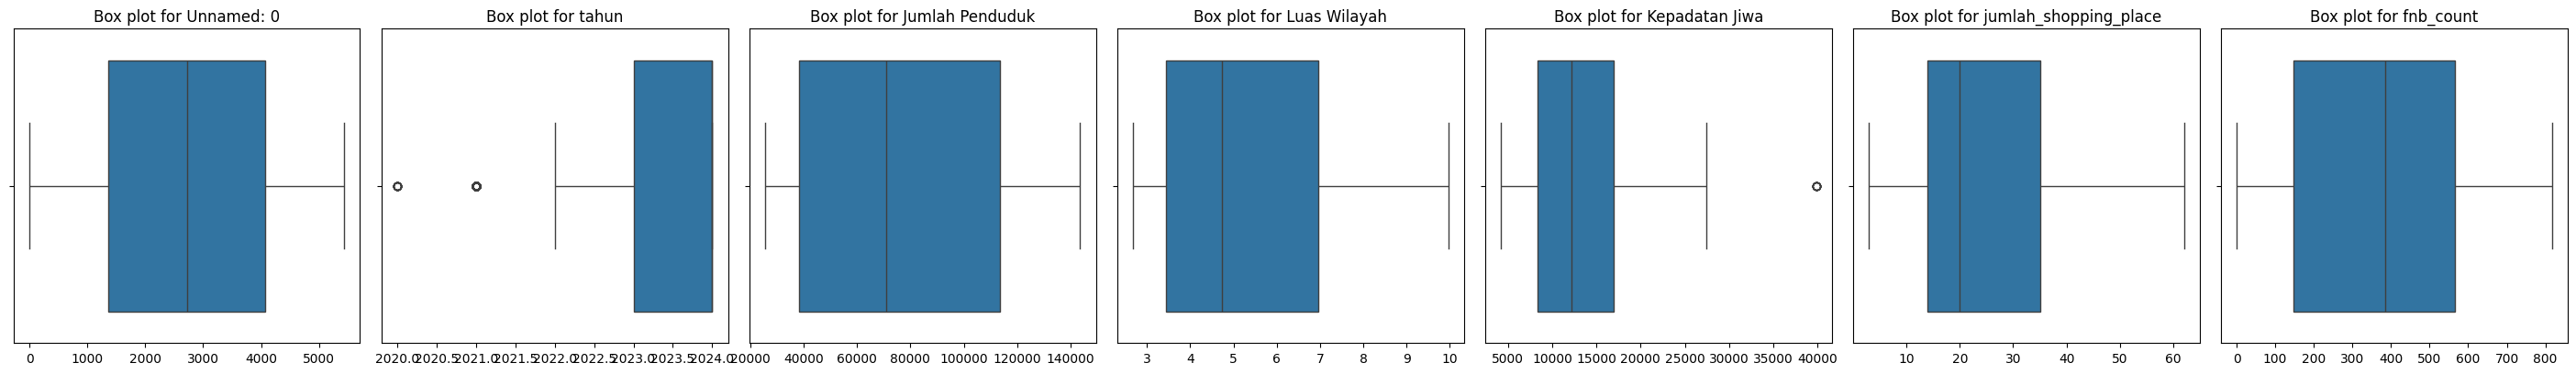

<Figure size 640x480 with 0 Axes>

In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns  #berfungsi untuk mengambil kolom dengan tipe data numerik pada dataset
fig, axs = plt.subplots(ncols=len(num_cols), figsize=(4 * len(num_cols), 4))

#berfungsi untuk membuat grid plot secara horizontal menyesuaikan dengan ukurannya pada subplot

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f'Box plot for {col}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
plt.show()
plt.savefig('../results/Box_Plot.png')

# Data Preparation

In [6]:
# Create Final Training Dataset - SIMPLIFIED VERSION
import pandas as pd
import numpy as np

# Load datasets
df_primary = pd.read_csv('../datasets/primary_dataset.csv')
df_taman = pd.read_csv('../datasets/cleaned_taman_kota_bandung.csv')
df_restaurant = pd.read_csv('../datasets/full_restaurant_dataset_with_google_rupiah.csv')
df_kecamatan = pd.read_csv('../datasets/cleaned_data_Kepadatan_menurut_kecamatan.csv')

# Standardize kecamatan names
for df in [df_primary, df_taman, df_restaurant, df_kecamatan]:
    df['kecamatan'] = df['kecamatan'].str.lower().str.strip()
    df.loc[df['kecamatan'] == 'ujungberung', 'kecamatan'] = 'ujung berung'

print(f"✅ Loaded datasets: Primary({df_primary.shape}), Taman({df_taman.shape}), Restaurant({df_restaurant.shape}), Demographic({df_kecamatan.shape})")

# Get unique kecamatan
unique_kecamatan = df_primary['kecamatan'].unique()
final_dataset = pd.DataFrame({'kecamatan': unique_kecamatan})

# 1. FnB Statistics
fnb_stats = df_restaurant.groupby('kecamatan').agg({
    'nama': 'count',
    'google_rating': 'mean'
}).round(2)
fnb_stats.columns = ['jumlah_fnb', 'avg_rating']
fnb_stats = fnb_stats.reset_index()

# 2. Taman Statistics  
taman_stats = df_taman.groupby('kecamatan').size().reset_index(name='jumlah_taman')

# 3. Price Statistics
def extract_price(price_str):
    if pd.isna(price_str): return np.nan
    try:
        price_str = str(price_str).replace('Rp', '').replace('.', '').replace(',', '')
        if '-' in price_str:
            parts = price_str.split('-')
            return (float(parts[0].strip()) + float(parts[1].strip())) / 2
        return float(price_str.strip())
    except: return np.nan

df_restaurant['price_numeric'] = df_restaurant['price_range_rupiah'].apply(extract_price)
price_stats = df_restaurant.groupby('kecamatan')['price_numeric'].mean().round(2).reset_index()
price_stats.columns = ['kecamatan', 'avg_price']

# 4. Merge all data
final_dataset = final_dataset.merge(fnb_stats, on='kecamatan', how='left')
final_dataset = final_dataset.merge(taman_stats, on='kecamatan', how='left') 
final_dataset = final_dataset.merge(price_stats, on='kecamatan', how='left')
final_dataset = final_dataset.merge(df_kecamatan, on='kecamatan', how='left')

# 5. Fill missing values
numeric_cols = final_dataset.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if 'jumlah' in col.lower():
        final_dataset[col] = final_dataset[col].fillna(0)
    else:
        final_dataset[col] = final_dataset[col].fillna(final_dataset[col].median())

final_dataset = final_dataset.round(2)

# 6. Save and display results
final_dataset.to_csv('../datasets/final_training_dataset.csv', index=False)

print(f"\n🎯 FINAL DATASET READY!")
print(f"Shape: {final_dataset.shape}")
print(f"Columns: {list(final_dataset.columns)}")
print(f"\nFirst 5 rows:")
print(final_dataset.head())
print(f"\nSaved to: ../datasets/final_training_dataset.csv")

✅ Loaded datasets: Primary((5439, 10)), Taman((999, 4)), Restaurant((5116, 15)), Demographic((30, 4))

🎯 FINAL DATASET READY!
Shape: (31, 8)
Columns: ['kecamatan', 'jumlah_fnb', 'avg_rating', 'jumlah_taman', 'avg_price', 'Jumlah Penduduk', 'Luas Wilayah (km²)', 'Kepadatan (jiwa/km²)']

First 5 rows:
       kecamatan  jumlah_fnb  avg_rating  jumlah_taman  avg_price  \
0        coblong         534        4.56          37.0   65315.53   
1       sukasari         174        4.53          23.0   69800.00   
2        cicendo         289        4.49          46.0   76875.00   
3  bandung wetan         817        4.51         117.0   75000.00   
4          regol         138        4.43          15.0   67608.70   

   Jumlah Penduduk  Luas Wilayah (km²)  Kepadatan (jiwa/km²)  
0         115273.0                7.31              15769.22  
1          77576.0                6.36              12197.48  
2          96382.0                7.79              12372.53  
3          28848.0              

✅ Correlation Matrix Created!
Dataset shape: (31, 8)
Numeric columns: ['jumlah_fnb', 'avg_rating', 'jumlah_taman', 'avg_price', 'Jumlah Penduduk', 'Luas Wilayah (km²)', 'Kepadatan (jiwa/km²)']


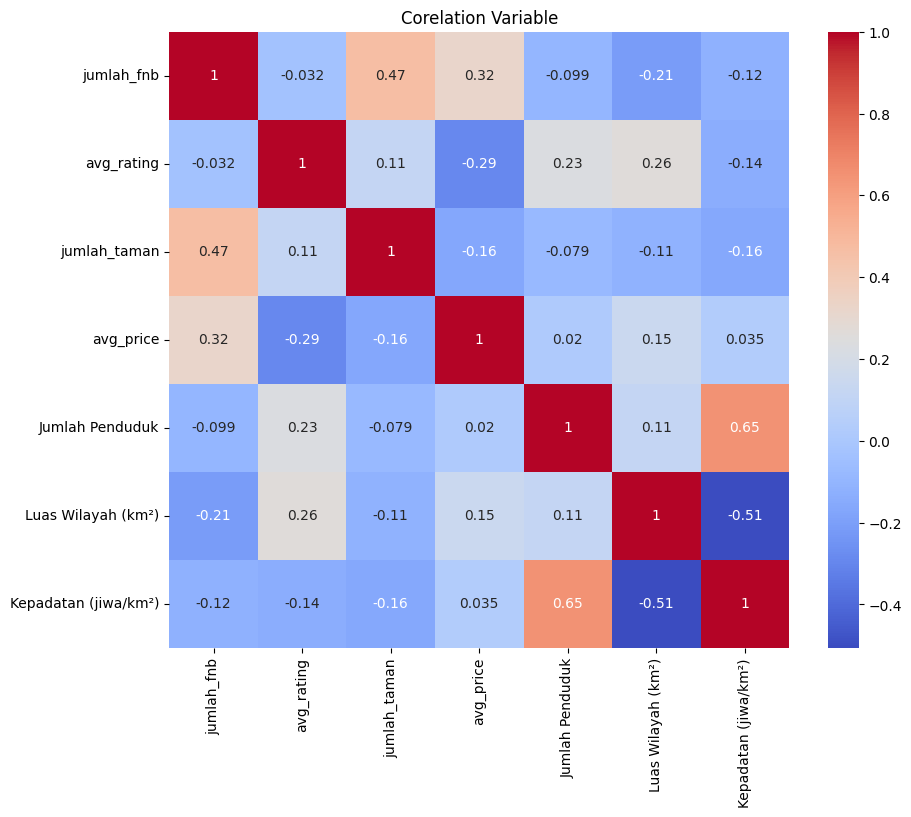

In [8]:

# Simple Correlation Matrix Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load final dataset
df_final = pd.read_csv('../datasets/final_training_dataset.csv')

# Create clean correlation matrix
numeric_data = df_final.select_dtypes(include='number').fillna(0)
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_final.select_dtypes(include=[np.number]).corr(),annot=True, cmap='coolwarm')
plt.title('Corelation Variable')
plt.savefig('../results/Correlation_Variable.png')

print("✅ Correlation Matrix Created!")
print(f"Dataset shape: {df_final.shape}")
print(f"Numeric columns: {list(numeric_data.columns)}")